
# Plot multinomial and One-vs-Rest Logistic Regression

Plot decision surface of multinomial and One-vs-Rest Logistic Regression.
The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers
are represented by the dashed lines.


training score : 0.813 (multinomial)
training score : 0.807 (ovr)


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\marti\AppData\Local\Temp\ipykernel_28620\3106358967.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

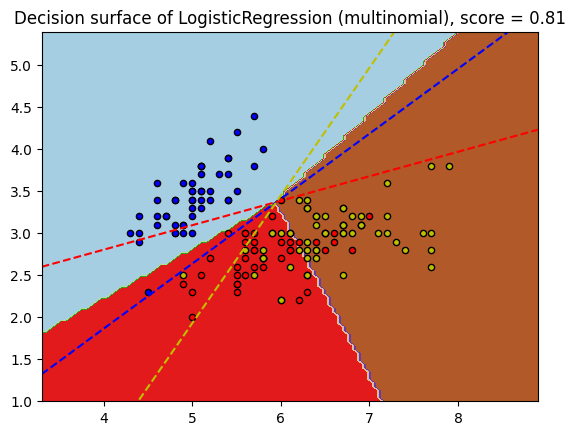

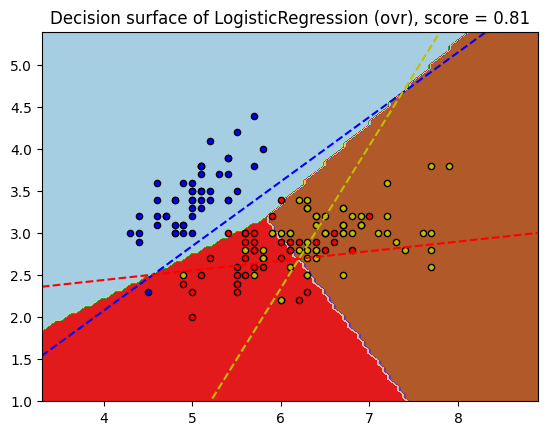

In [11]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# make 3-class dataset for classification
# centers = [[-5, 0], [0, 1.5], [5, -1]]
# X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
# transformation = [[0.4, 0.2], [-0.4, 1.2]]
# X = np.dot(X, transformation)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(solver="sag", max_iter=100, random_state=42)
    if multi_class == "ovr":
        clf = OneVsRestClassifier(clf)
    clf.fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
    plt.title(f"Decision surface of LogisticRegression ({multi_class}), score = {clf.score(X,y):.2f}")
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    if multi_class == "ovr":
        coef = np.concatenate([est.coef_ for est in clf.estimators_])
        intercept = np.concatenate([est.intercept_ for est in clf.estimators_])
    else:
        coef = clf.coef_
        intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

### Multinomial vs. Multiclass Classification

#### Concept

**Multinomial Regression**:
Multinomial regression is a type of logistic regression used for modeling outcomes with more than two categories. It generalizes binary logistic regression to multiple classes by modeling the probability of each class using a set of logistic functions.

**Multiclass Classification**:
Multiclass classification refers to the task of classifying instances into one of three or more classes. It can be implemented using various strategies like One-vs-Rest (OvR) or One-vs-One (OvO).

#### Mathematical Formulation

**Multinomial Regression**:
For a target variable $\  Y  $ with $\  K  $ classes, multinomial logistic regression models the probability of the target being in class $\  k  $ as follows:

$\
P(Y = k | \vec{x}) = \frac{e^{\vec{w}_k^T \vec{x} + b_k}}{\sum_{j=1}^{K} e^{\vec{w}_j^T \vec{x} + b_j}}
$

where:
- $\ \vec{x} $ is the feature vector.
- $\ \vec{w}_k $ is the weight vector for class $\  k  $.
- $\ b_k $ is the bias term for class $\  k  $.
- $\ K $ is the number of classes.

**Multiclass Classification (OvR)**:
For a target variable $\  Y  $ with $\  K  $ classes, OvR trains $\  K  $ binary classifiers, each solving:

$\
P(Y = k | \vec{x}) = \sigma(\vec{w}_k^T \vec{x} + b_k)
$

where $\ \sigma $ is the sigmoid function.

#### Key Differences

1. **Model Structure**:
   - **Multinomial Regression**: Directly models the probability of each class using the softmax function, considering the interdependencies among classes.
   - **Multiclass Classification (OvR)**: Independently trains binary classifiers for each class, treating the classification problem as multiple binary problems.

2. **Probability Estimation**:
   - **Multinomial Regression**: Produces a probability distribution over all classes, ensuring that the sum of probabilities for all classes equals 1.
   - **Multiclass Classification (OvR)**: Produces independent probability estimates for each class, which may not sum to 1.

3. **Complexity**:
   - **Multinomial Regression**: More computationally intensive as it requires solving a more complex optimization problem.
   - **Multiclass Classification (OvR)**: Simpler to implement and often faster, as it breaks down the problem into multiple binary classification tasks.

4. **Interpretability**:
   - **Multinomial Regression**: Provides a more cohesive model by directly modeling the relationship between features and all classes simultaneously.
   - **Multiclass Classification (OvR)**: Easier to interpret individual binary classifiers but may lack the cohesive probabilistic interpretation of multinomial regression.

#### Main Advantages and Disadvantages

**Multinomial Regression**:
- **Advantages**:
  - Models the interdependencies among classes.
  - Produces a probability distribution over all classes.
- **Disadvantages**:
  - More computationally intensive.
  - Can be less interpretable due to the complexity of the model.

**Multiclass Classification (OvR)**:
- **Advantages**:
  - Simpler and often faster to implement.
  - Easier to interpret individual binary classifiers.
- **Disadvantages**:
  - Independent probability estimates may not sum to 1.
  - Does not model the interdependencies among classes.
